<h1 style="text-align: center"><b><i>Disney Plus Hostar - Time Series & Pattern Recognition</i></b></h1>

#### **1. Importing packages and datasets**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("disney_plus_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


### **2. Dataset Information**

In [6]:
df.shape

(1368, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### **3. Time Series Forcasting**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.set_index('date_added', inplace=True)

In [11]:
monthly_data = df['show_id'].resample('M').count()

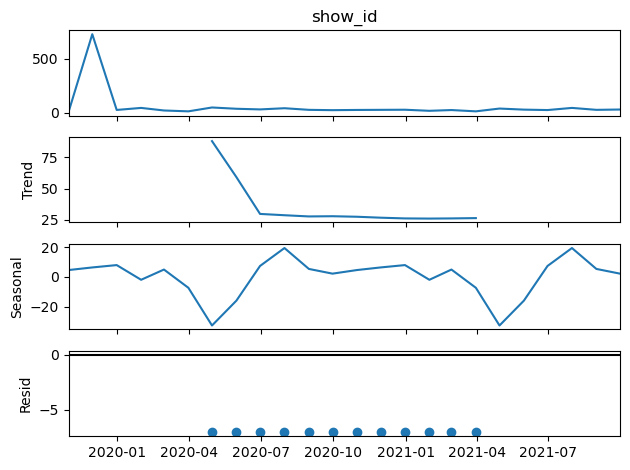

In [12]:
decomposition = seasonal_decompose(monthly_data, model='additive')
decomposition.plot()
plt.show()

In [13]:
model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

/home/varun/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


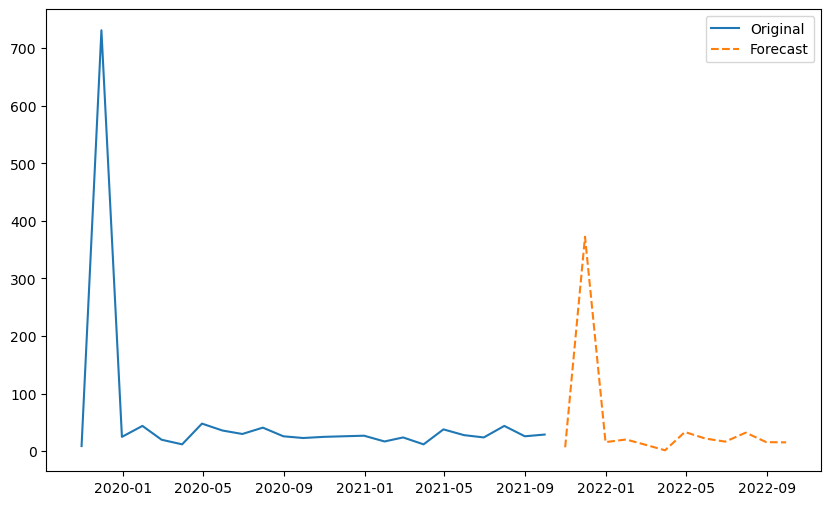

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()

### **4. Natural Language Processing using NLTK and Vader lexicon**

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(description):
    return sid.polarity_scores(description)['compound']

# Apply the function to the 'description' column
df['sentiment_score'] = df['description'].apply(get_sentiment)

# Display the sentiment scores
df[['description', 'sentiment_score']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/varun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,description,sentiment_score
date_added,,
2021-09-24,Two Pixar filmmakers strive to bring their uni...,0.2263
2021-09-24,The puppies go on a spooky adventure through a...,-0.2023
2021-09-24,Hazel and Gus share a love that sweeps them on...,0.7506
2021-09-22,Matt Beisner uses unique approaches to modifyi...,0.0000
2021-09-22,Spidey teams up with pals to become The Spidey...,0.0000
...,...,...
2019-10-01,Merlin trains a young orphan who's destined to...,0.0000
2019-10-01,A strong-willed family struggles to establish ...,-0.3612
NaT,Welcome to Kirby's world! It's rude and sketchy.,0.0000


### **5. KMeans clustering with respect to duration**

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [20]:
df_data = df[df.duration.str.endswith("min")]
df_data['duration'] = df_data['duration'].str.replace(' min', '').astype(float)
data = df_data[['release_year', 'duration']].dropna()

/tmp/ipykernel_8736/1767386201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['duration'] = df_data['duration'].str.replace(' min', '').astype(float)


In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data_scaled)

/home/varun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


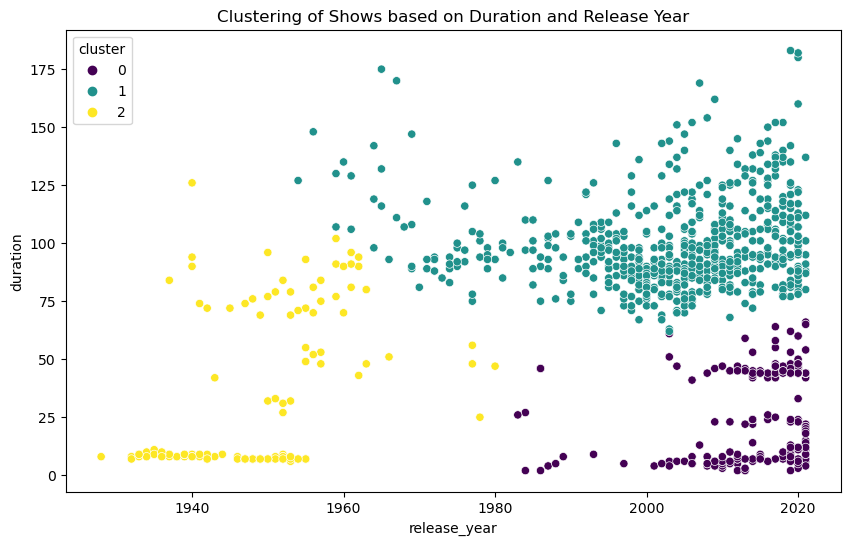

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Shows based on Duration and Release Year')
plt.show()

<h1 style="text-align: center"><b>Thank You</b></h1>